# Working with decision trees along with some exploratory data analysis

### Setup
We'll use the wine quality dataset.  
If you have not downloaded it already, do it now from: https://archive.ics.uci.edu/ml/datasets/Wine+Quality  


_Once downloaded, create a folder 'data' in the same folder as this notebook, create another folder in 'data' called 'wine' and copy the files into 'wine'._

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import os

In [2]:
red_wine_file = "./data/wine/winequality-red.csv"
# Just check if the file you've entered is at the right path...
# print (os.path.abspath(red_wine_file))
# Load the CSV data into a dataframe - notice haw we have specified the delimiter
red_wine_data = pd.read_csv(red_wine_file, sep=";")
# Describe the data in the file - this returns a dataframe
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Obsesrvations:
- We see that the data in some columns is spread out (like 'free sulfur dioxide' and 'total sulfur dioxide' columns)  
- ...and is fairly close to the average in others (like the 'density' column).  

##### An intution about the percentiles
Let's say we sort the entire red wine data on a column, say pH, in ascending order.
The top of the list will then be the minimum value of pH, traversing 25% down the list will be the 25th percentile value, the 50th percentile in the middle, then the 75th percentile and the last record will indicate the highest pH.  
Let's look at some raw data and plot some of it:

In [3]:
# list the top 5 rows of the red wine data
red_wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# list the last 5 rows of the red wine data
red_wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# value_counts() gives the count of uniue values in a dataset
print(red_wine_data["pH"].value_counts())

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
3.29    46
3.32    45
3.34    43
3.28    42
3.35    39
3.20    39
3.22    39
3.31    39
3.40    37
3.37    37
3.33    37
3.21    36
3.16    36
3.27    35
3.15    34
3.41    34
3.42    33
3.23    32
3.18    30
3.44    29
3.24    29
3.17    27
3.25    26
3.19    25
3.46    22
        ..
3.03     6
3.00     6
3.68     5
3.01     5
2.98     5
2.94     4
2.92     4
3.62     4
3.69     4
3.66     4
3.71     4
2.89     4
3.72     3
3.67     3
3.63     3
2.93     3
4.01     2
2.99     2
3.78     2
2.88     2
3.90     2
3.85     1
3.75     1
2.74     1
2.86     1
2.95     1
3.74     1
2.87     1
2.90     1
3.70     1
Name: pH, Length: 89, dtype: int64


In [6]:
red_wine_desc=red_wine_data.describe()

'''
# if you want to explore the internals of the describe() dict
# Here's how the describe dict is structured:
# keys
print(red_wine_desc['pH'])
# columns in each record
print(red_wine_desc['pH']['std'])
# how would one access all the values of standard deviation for all keys?
print([(element,type(element), red_wine_desc[element]['std']) for element in red_wine_desc])
std_list = [red_wine_desc[element]['std'] for element in red_wine_desc]
std_list'''

"\n# if you want to explore the internals of the describe() dict\n# Here's how the describe dict is structured:\n# keys\nprint(red_wine_desc['pH'])\n# columns in each record\nprint(red_wine_desc['pH']['std'])\n# how would one access all the values of standard deviation for all keys?\nprint([(element,type(element), red_wine_desc[element]['std']) for element in red_wine_desc])\nstd_list = [red_wine_desc[element]['std'] for element in red_wine_desc]\nstd_list"

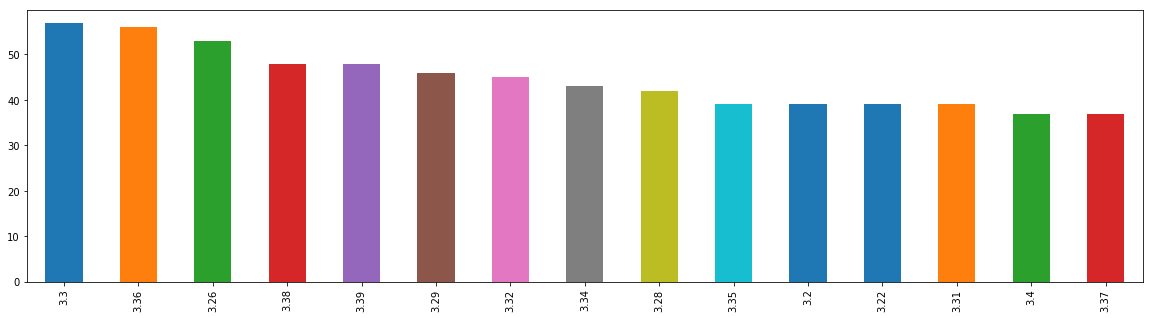

In [7]:
# plot the # of unique occurances for pH values
red_wine_data["pH"].value_counts().head(15).plot(kind='bar',figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002401F8BC3C8>,
      dtype=object)

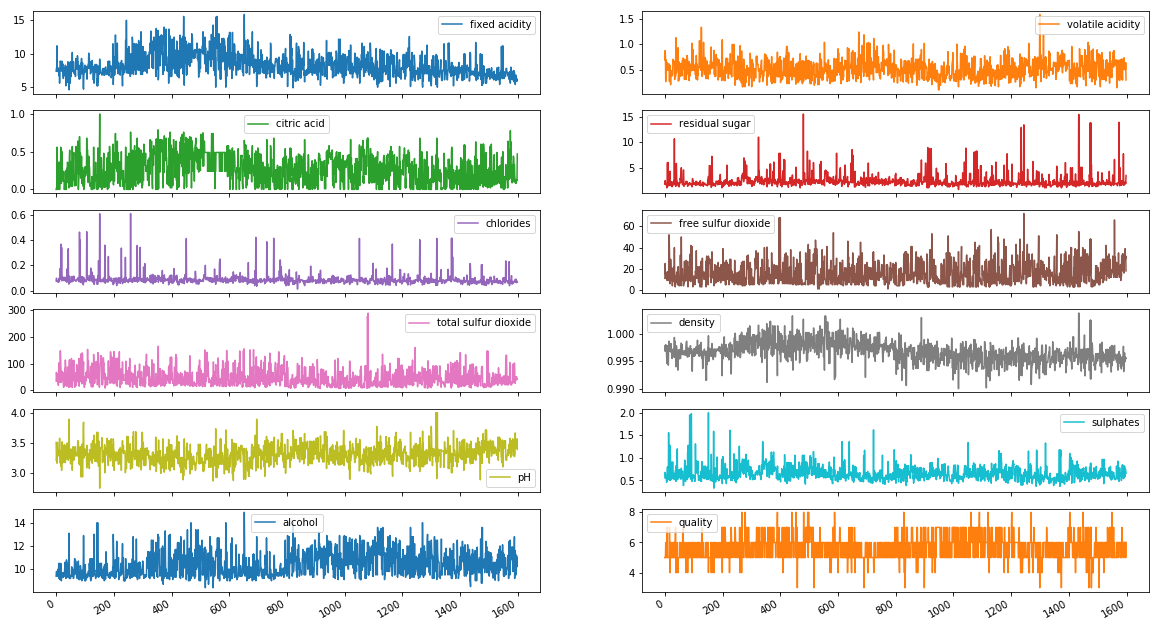

In [8]:
# plot the movement of features for all observations
red_wine_data.plot(kind='line',figsize=(20,20),subplots=True,layout=(10,2))

In [9]:
# (unhelpful) - histograms for everything:
# red_wine_data.plot(kind='hist',figsize=(20,30),subplots=True,layout=(10,3))

let's dig deeper

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002401F5D7D30>],
      dtype=object)

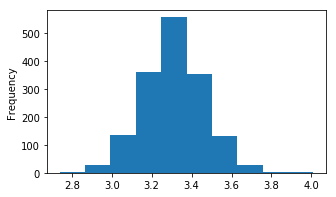

In [10]:
# histogram for just pH
red_wine_data["pH"].plot(kind='hist',figsize=(5,3), subplots=True)

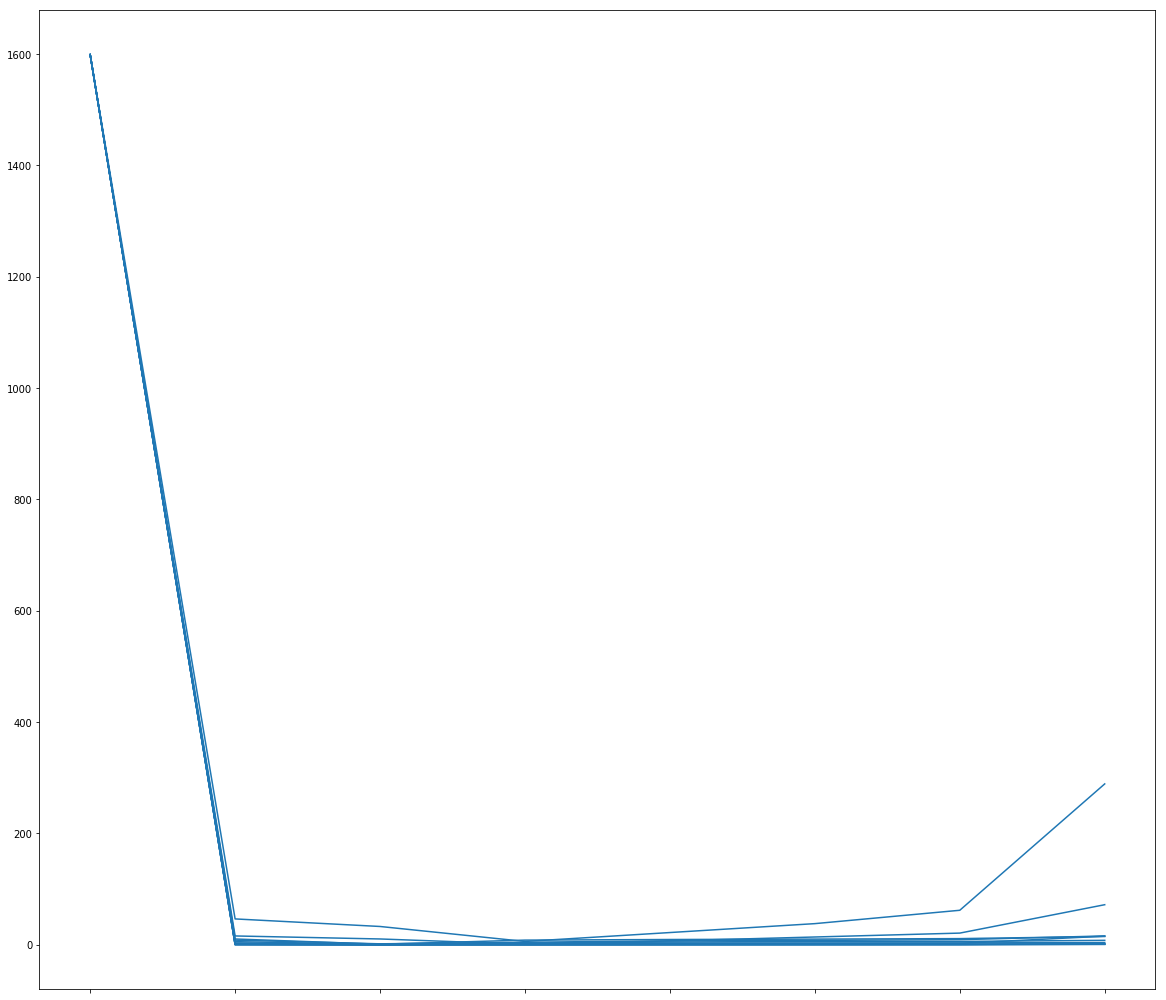

In [25]:
# plot the standard deviation for each column 
for element in red_wine_desc:
    #print (red_wine_desc[element])
    red_wine_desc[element].plot(x='std',kind='line',figsize=(20,20), subplots=True)

All this is cool, let's start asking some questions:
- What does the quality of a wine depend upon?
- how does the quality of a wine correlate to the various features we have observed?

In [12]:
red_wine_data.plot(x='all',y='quality',kind='line',figsize=(5,20),subplots=True,layout=(10,2))

KeyError: 'all'